# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [41]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

X = student_data['X']
Y = student_data['Y']

Draw a dispersion diagram (scatter plot) for the data.

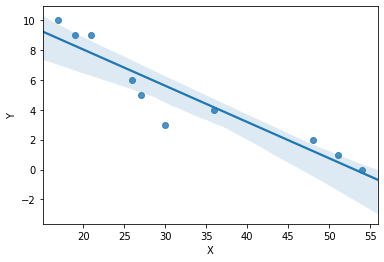

In [42]:
# Your code here.
sns.regplot(X,Y, data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [27]:
# Your response here. 
# Hipotheses: the younger the student, higher chance off being late.
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [23]:
# Your response here.

#correlation:
corl = X.corr(Y) #corl = -0.94

## There is a high correlation between them, since the closer to |1| the higher is the correlation
## between the variables. The negative number means that the higher one variable is, the lower
## the other variable is.

#covariance:
np.cov(X, Y)

## The covariance works similar to the correlation, representing the degree in which the two
## variables are related. The difference is that correlation doesn't assume a dimension, taking 
## as fixed parameter |1| as the highest degree of relation between variables. 
## Covariance, on the other hand, takes into account the units of the variables.

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [37]:
# Your response here.
from scipy import stats
slope, intersect, r_value, p_value, std_err = stats.linregress(X, Y)
y = slope*X + intersect
x = Y-y

## In this case I'm using linear regression model.
## Having 'y' as the outcome variable, as it depends on 'x' values.

Plot your regression model on your scatter plot.

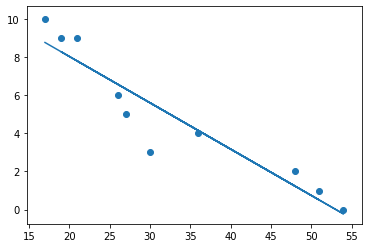

In [63]:
# Your code here.

plt.plot(X, y)
plt.scatter(X,Y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Linear regression took the average age and tardiness to calculate and predict the behavior based on
# the age of the students. The closest to the line the dots on the linear regression plot, the more
# accurate the model is. In this case, the model is pretty accurate, with some outliers, like the
# student with 30.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [92]:
# Import any libraries you may need & the data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
data_all = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [74]:
# Your response here. 
data = data_all[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 
    'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].copy()

data.corr()

# The most correlated variable to CO2 emission is the ammount of Fuel Barrels/Year.
# The least correlated is the 'Year' and 'Cylinders' of the vehicle.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

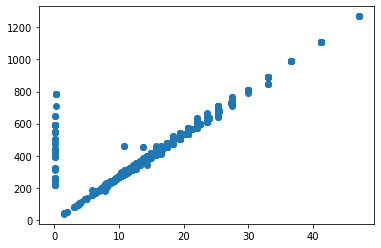

In [75]:
# Your response here. 
x = data['Fuel Barrels/Year']
y = data['CO2 Emission Grams/Mile']

plt.scatter(x,y)
data_all.columns


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
3070,2015,2,1.563190,39,1050,40.000000
3071,2016,2,1.563190,39,1050,37.000000
3069,2014,2,1.563190,39,1050,40.000000
7916,2016,4,2.006844,42,800,51.000000
7917,2017,4,2.006844,42,800,51.000000
...,...,...,...,...,...,...
20898,1990,12,47.087143,7,5800,1269.571429
20897,1989,12,47.087143,7,5800,1269.571429
20896,1988,12,47.087143,7,5800,1269.571429
20895,1987,12,47.087143,7,5800,1269.571429


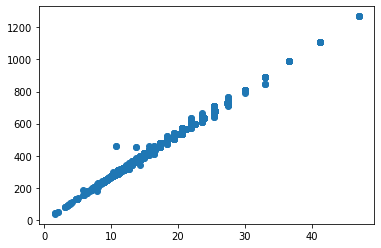

In [85]:
# Checking outliers... probably some eletric vehicles on datase...
## Removing the ones who do not use reasonable ammount of fuel:
data = data[data['Fuel Barrels/Year'] > 0.1]
x = data['Fuel Barrels/Year']
y = data['CO2 Emission Grams/Mile']
plt.scatter(x,y)
data.sort_values(by='Fuel Barrels/Year')

In [102]:
# Lineat regression for only Fuel x CO2 would be:
#slope, intersect, r_value, p_value, std_err = stats.linregress(x,y)
#Y = slope*x + intersect


# Regression for all the columns:

Y = data_all['CO2 Emission Grams/Mile'] 
X = data_all[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 
    'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          1.218e+31
Date:                     Wed, 13 Nov 2019   Prob (F-statistic):                        0.00
Time:                             16:18:48   Log-Likelihood:                      8.5660e+05
No. Observations:                    35952   AIC:                                 -1.713e+06
Df Residuals:                        35946   BIC:                                 -1.713e+06
Df Model:                                6                                                  
Covariance Type:                 nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year                     1.416e-15   5.89e-16      2.402      0.016     2.6e-16    2.57e-15
Cylinders               -1.066e-14   5.24e-14     -0.203      0.839   -1.13e-13    9.21e-14
Fuel Barrels/Year       -1.572e-13   7.76e-14     -2.025      0.043   -3.09e-13   -5.02e-15
Combined MPG             6.395e-14   2.99e-14      2.140      0.032    5.39e-15    1.23e-13
Fuel Cost/Year           2.845e-15   3.29e-16      8.638      0.000     2.2e-15    3.49e-15
CO2 Emission Grams/Mile     1.0000   3.41e-15   2.93e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                     7904.207   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20629.505
Skew:                          -1.193   Prob(JB):                         0.00
Kurtosis:                       5.843   Cond. No.                     3.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# A model including all the columns is not a good choice, since the 'Year' and 'Cylinder' aren't
# very correlated. The most important variables are the Fuel Barrel and Cost.
# It's also interesting to clean data from outliers to get better results.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [103]:
# Your code here.
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

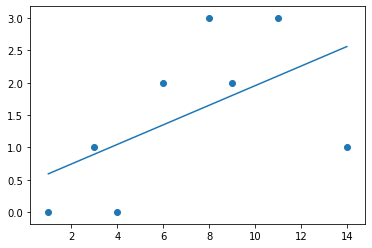

In [107]:
# Your code here.
X = data['X']
# If the idea is to check how many more are unable to attend, for Y:
Y = data['X'] - data['Y']

slope, intersect, r_value, p_value, std_err = stats.linregress(X, Y)
y = slope*X + intersect

plt.plot(X,y)
plt.scatter(X,Y)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
# The plot doesn't seem a good fit, some outliers for 4, 8 and 14


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

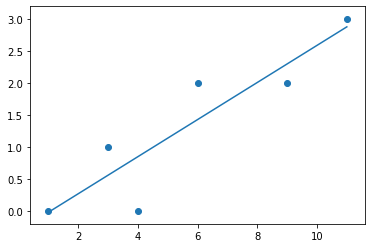

In [110]:
# Your response here. 
no_out = data[(data['X'] != 8) & (data['X'] != 14)]
X = no_out['X']
Y = no_out['X'] - no_out['Y']

slope, intersect, r_value, p_value, std_err = stats.linregress(X, Y)
y = slope*X + intersect

plt.plot(X,y)
plt.scatter(X,Y)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# The new regression model fits better the dataset. Ouliers influence the final result and are not
# good limiters for predictions.